## Parsing Text from Image

In [1]:
import cv2
import pytesseract
import pathlib
import os
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt 

In [2]:
path_to_folder =  pathlib.Path(r'C:\Users\i323570\OneDrive - SAP SE\Documents\Python\python-projects\python-projects\Machine Learning Projects\Text_from_image')
os.chdir(path_to_folder)
file_path = os.path.join(os.getcwd() , 'data')
filename = 'X51005200931.jpg'

#### Load the pytesseract installation

In [3]:
pytesseract.pytesseract.tesseract_cmd = str(pathlib.Path(r"C:\Users\i323570\AppData\Local\Tesseract-OCR\tesseract.exe"))

In [4]:
test_image_path = os.path.join(file_path,filename)
img = cv2.imread(test_image_path)

#### Show the sample image

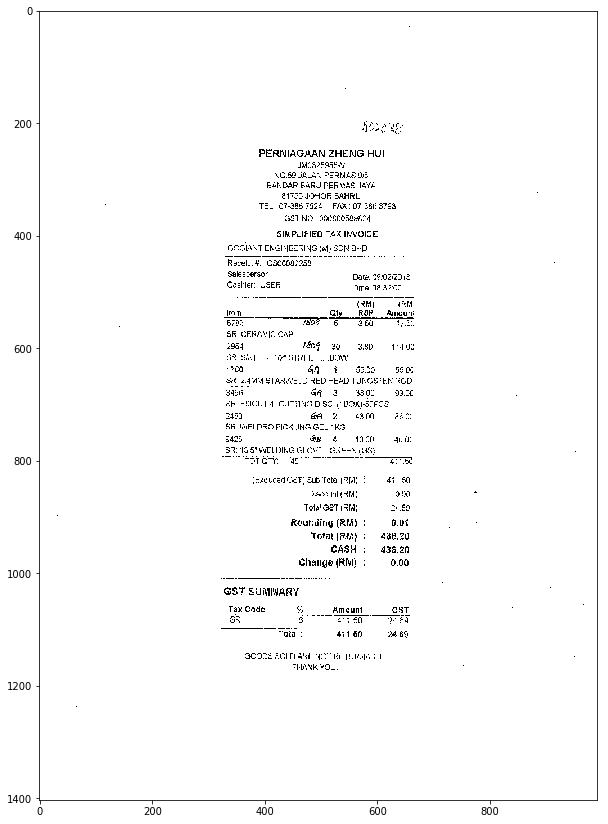

In [5]:
plt.figure(figsize=(10,15))
plt.imshow(img)

#### Cropping the image

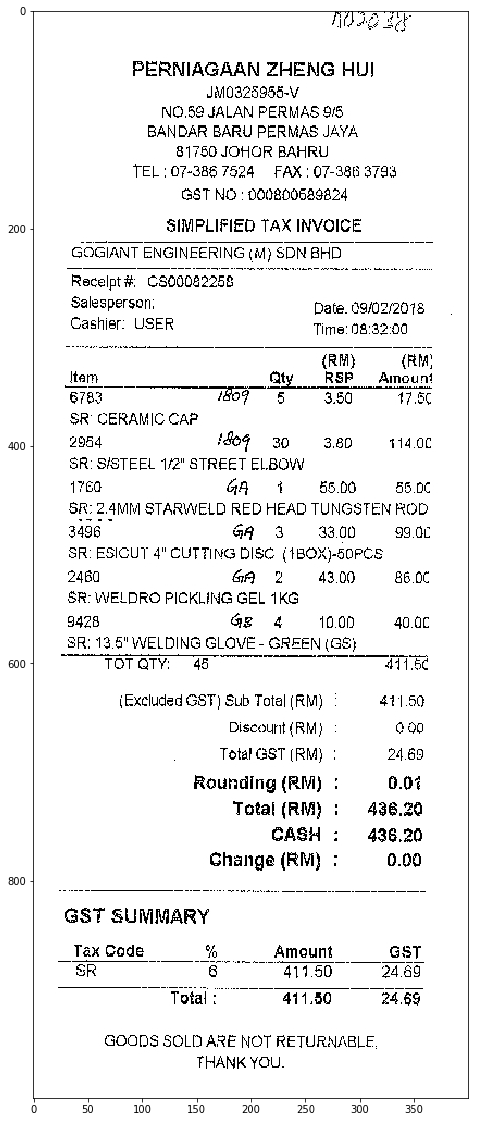

In [6]:
y=200
x=300
h=1000
w=400

cropped_image = img[y:y+h , x:x+w].copy()
plt.figure(figsize=(15,20))
plt.imshow(cropped_image)

In [7]:
img = cv2.imread(test_image_path)
text = pytesseract.image_to_string(img)
print(text)

PERNIAGAAN ZHENG HU!
JMOs25956-V
NO.8@ JALAN PERMAS 9/6
BANDAR BARU PERMAS JAYA
81780 JOHOR BAHRU
TEL : 07-386 7524 FAX : 07-388 3798
GST NO : DoNR;OBaGa24

SIMPLIFIED TAX INVOICE

 

  

 

Salesperson; Date. 09/02/2018
Cashier: USER Time: 08:32:00
~ (RR) RI
ttam Qty REP. und

“eres Woy 5 380 HBL
SR’ CERAMIC CAP

 

2084 $804 30 380 114.00
SR: SISTEEL 1/2" STREET ELBOW
1760 GA 4 85.00 6.00
SR: 24MIN STARWELD RED HEAD TUNGSTEN ROD
3498” GA 3 OD 9g.0e
SR: ESICUT 4" CUTTING DISC (1BOX)-50PCS
2480 GA 2 43.00 -86.0¢
SR: WELDRO PICKLING GEL 1kG
9428 Ge 4 1900 400c
SR: 13.5" WELDING GLOVE- GREEN (@3}
TOT aT ae BTEC
(Exclided GST) Sub Total (RM) 411.50
Discount (RM) ooo
Total GST (RM) 24.69
Rounding (RM) : 0.0%
Total (RM} : 436.20
GASH : 436.20
Ghange (RM) : 0.00

 

GST SUMMARY

  

417,50

 

GOONS SOLD ARE NOT RETURNABLE,
THANK YOU.


In [8]:
# -------------------

In [9]:
# -------------------

#### Annotating the text

In [10]:
# Split into multiple lines
lines = text.splitlines()

In [11]:
new_lines_without_blanks = []
for i,line in enumerate(lines):
    if line.rstrip():
        new_lines_without_blanks.append(line)

new_lines_without_blanks

['PERNIAGAAN ZHENG HU!',
 'JMOs25956-V',
 'NO.8@ JALAN PERMAS 9/6',
 'BANDAR BARU PERMAS JAYA',
 '81780 JOHOR BAHRU',
 'TEL : 07-386 7524 FAX : 07-388 3798',
 'GST NO : DoNR;OBaGa24',
 'SIMPLIFIED TAX INVOICE',
 'Salesperson; Date. 09/02/2018',
 'Cashier: USER Time: 08:32:00',
 '~ (RR) RI',
 'ttam Qty REP. und',
 '“eres Woy 5 380 HBL',
 'SR’ CERAMIC CAP',
 '2084 $804 30 380 114.00',
 'SR: SISTEEL 1/2" STREET ELBOW',
 '1760 GA 4 85.00 6.00',
 'SR: 24MIN STARWELD RED HEAD TUNGSTEN ROD',
 '3498” GA 3 OD 9g.0e',
 'SR: ESICUT 4" CUTTING DISC (1BOX)-50PCS',
 '2480 GA 2 43.00 -86.0¢',
 'SR: WELDRO PICKLING GEL 1kG',
 '9428 Ge 4 1900 400c',
 'SR: 13.5" WELDING GLOVE- GREEN (@3}',
 'TOT aT ae BTEC',
 '(Exclided GST) Sub Total (RM) 411.50',
 'Discount (RM) ooo',
 'Total GST (RM) 24.69',
 'Rounding (RM) : 0.0%',
 'Total (RM} : 436.20',
 'GASH : 436.20',
 'Ghange (RM) : 0.00',
 'GST SUMMARY',
 '417,50',
 'GOONS SOLD ARE NOT RETURNABLE,',
 'THANK YOU.']

In [12]:
from nltk.tokenize import word_tokenize #RegexpTokenizer
import re
from itertools import groupby

data = pd.DataFrame(columns=['product_id','price'])
product_ids = []
price = []
# tokenizer = RegexpTokenizer(r'\w+')
for i,line in enumerate(new_lines_without_blanks):
    if i<14:
        continue
    if re.search('TOT',line):
        break    

    words = word_tokenize(line)
    if words[0].isdigit():
        product_ids.append(words[0])
        price.append(words[-1])

data.product_id = product_ids
data.price = price

data.head()

,product_id,price
0,2084,114.00
1,1760,6.00
2,3498,9g.0e
3,2480,-86.0¢
4,9428,400c
